In [2]:
#Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
import random

from gradiente import *

## <center> Gradiente Estocástico </center>

In [3]:
def stochastic_gradient_descent(X,y,beta,alpha=0.01,ninter=100,q=0.5):
    
    try: X = np.append(X.reshape((len(X),1)),(np.ones((len(X),1))),axis=1)
    except: X = np.append(X,(np.ones((len(X),1))),axis=1)

    beta = np.asarray(beta)
    cost_history = np.zeros(ninter) ; beta_history = np.zeros((ninter,len(beta)))
    for i in range(ninter):
        
        index = np.arange(len(y))
        np.random.shuffle(index)
    
        X_i = X[:int(len(index)*q)] ; y_i=y[:int(len(index)*q)]
        
        beta = beta - alpha*(X_i.T.dot((predict(beta,X_i))-y_i))*(1/len(y_i))
        beta_history[i,:] = beta.T
        cost_history[i] = cost(beta,X,y)
    return beta, cost_history, beta_history

#### Gerando um Dataset sintético identico ao exemplo 2:

A função utilizada para gerar o conjunto de dados sintético será:

$$ y = \beta_0 + \beta_1 x$$

onde $\beta_0 = 7$ e $\beta_1 = 3$, ou seja:

$$ y = 7+3x $$

In [5]:
X = 5*np.random.rand(250)  #Gerando as observações aleatóriamente
y = 5*X + 7 + np.random.normal(scale=3,size=250) # adicionando um ruído no dado observado

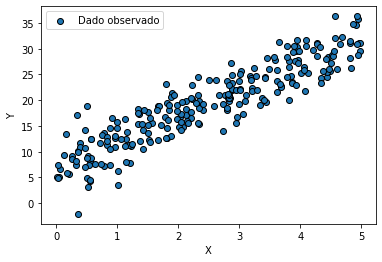

In [6]:
plt.scatter(X,y,edgecolor='black',label='Dado observado')
plt.xlabel('X') ; plt.ylabel('Y')
plt.legend()

#### Gerando um modelo inicial

In [7]:
beta_ini = 15*np.random.normal(size=2)
beta_ini

array([ 13.72275965, -13.34423101])

#### Ajustando para o método do gradiente estocástico

In [106]:
beta_calc, cost_hist, beta_hist = gradient_descent(X,y,beta_ini,alpha=0.05,ninter=500)

beta_calc_s, cost_hist_s, beta_hist_s= stochastic_gradient_descent(X,y,beta_ini,alpha=0.05,ninter=500,q=0.3)

In [107]:
print("modelo inicial: {} \n modelo gradiente descent: {}  \n modelo gradiente estocástico: {}".format(beta_ini,beta_calc,beta_calc_s))

modelo inicial: [ 13.72275965 -13.34423101] 
 modelo gradiente descent: [4.94519258 7.12400377]  
 modelo gradiente estocástico: [4.93579546 6.87791637]


In [108]:
x_1 = np.append(np.linspace(0,6,200).reshape((200,1)),(np.ones((200,1))),axis=1)

In [109]:
print("modelo inicial: {} \n modelo gradiente descent: {}  \n modelo gradiente estocástico: {}".format(beta_ini,beta_calc,beta_calc_s))

modelo inicial: [ 13.72275965 -13.34423101] 
 modelo gradiente descent: [4.94519258 7.12400377]  
 modelo gradiente estocástico: [4.93579546 6.87791637]


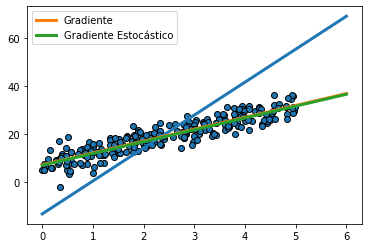

In [110]:
plt.scatter(X,y,edgecolor='black')

plt.plot(np.linspace(0,6,200),predict(beta_ini,x_1),lw=3)

plt.plot(np.linspace(0,6,200),predict(beta_calc,x_1),lw=3,label='Gradiente')

plt.plot(np.linspace(0,6,200),predict(beta_calc_s,x_1),lw=3,label='Gradiente Estocástico')

plt.legend()

In [111]:
x_p = np.append(X.reshape(len(X),1), np.ones((len(X),1)),axis=1)

In [112]:
print('Modelo inicial: %f' %mean_squared_error(y,predict(beta_ini,x_p)))
print('Método do Gradiente: %f' %mean_squared_error(y,predict(beta_calc,x_p)))
print('Método do Estocástico: %f' %mean_squared_error(y,predict(beta_calc_s,x_p)))

Modelo inicial: 165.899481
Método do Gradiente: 9.525715
Método do Estocástico: 9.598398


In [113]:
x_1 = np.append(X.reshape((len(X),1)),(np.ones((len(X),1))),axis=1)